\chapter{Diseño experimental}

In [1]:
%matplotlib inline

%run -i ../code/GPS_Core/gps_utils.py
%run -i ../code/GPS_Core/gps_library.py
%run -i ../code/GPS_Core/LS_Standalone.py
%run -i ../code/GPS_Core/LS_Coop.py

In [2]:
import pandas as pd
pd.set_option('display.precision',6)


dia1 = "011"
dian = "011"
ano = "2017"

Observable = "C1"
# Variables de la grafica
error_max = 100

# Ubicacion de la Rinex local DB 
Rinex_dataBase      = "../../new_data"
Simu_Folder         = getcwd() +"/" + "Temp_Simul_data"

# agregando nuevos pares de estaciones (que no estan en el kmz)
#parejas_kmz        = get_data_stations("./Coconet_sites_2016.kmz", 1e3)
#parejas_kmz        = get_data_stations("./UNAVCO_perm.kmz", 300) # 110
parejas_kmz = {}

#parejas_kmz[0] = ("OLVN", "AIRS", "NWBL",)
#parejas_kmz[5] = ('BELE', 'BEPA',)


parejas_kmz[1] = ("BARA", "TGDR", "JME2",)
parejas_kmz[2] = ("ljrn", "p553", "p554", "fzhs",)
parejas_kmz[3] = ("CN20", "TGPM",)
parejas_kmz[4] = ('TGMX', 'UNPM',)

info = {}
info[0] = "Monserrat (Antillas Caribeñas)"
info[1] = "Rep. Dominicana"
info[2] = "USA"
info[3] = "Panáma"
info[4] = "México"

RinexDB = descarga_Rinex_Compri(Rinex_dataBase, parejas_kmz, dia1, dian, ano)
## Leer los rinex almacenado en mi equipo
RinexDB = read_Rinex_Compri(Rinex_dataBase, parejas_kmz)

#pareja = parejas_kmz[3]
resolucion = 2000
tsample_sample = 15

axis_labels = ["gps_sow ["+str(resolucion*tsample_sample)+" s]", "error [m]", "stdlone_err vs coop_err"]


ion_mas= [None, "dual_freq", "dual_freq", "klobu", "dual_freq", "wallas", "dual_freq", "taylor"]
ion_rov= [None,  None,       "klobu",     "klobu",  "wallas",   "wallas", "taylor" ,   "taylor"]

distances=[0., 5, 10]

N_shemes_start = 6
N_shemes_end   = 7
show_plots_nb = True   # For development
show_plots_doc = True # For generate reports


 Descargando Nuevos Archivos ....
************************

	 [Estacion] 	 [dia GPS] 		 [RESULTADO]
	 bara
			 011 		 Archivos ya disponibles!!!
	 tgdr
			 011 		 Archivos ya disponibles!!!
	 jme2
			 011 		 Archivos ya disponibles!!!
	 ljrn
			 011 		 Archivos ya disponibles!!!
	 p553
			 011 		 Archivos ya disponibles!!!
	 p554
			 011 		 Archivos ya disponibles!!!
	 fzhs
			 011 		 Archivos ya disponibles!!!
	 cn20
			 011 		 Archivos ya disponibles!!!
	 tgpm
			 011 		 Archivos ya disponibles!!!
	 tgmx
			 011 		 Archivos ya disponibles!!!
	 unpm
			 011 		 Archivos ya disponibles!!!
Descarga Finalizada!! 



In [3]:
#RinexDB

Los conjuntos de estaciones empleados para evaluar cada uno de los escenarios anteriores será:

In [4]:

df_stations = pd.DataFrame(parejas_kmz.items(), index=parejas_kmz.keys(), columns=["Group", "Receivers"])
df_stations = df_stations.set_index("Group")
df_stations = df_stations.assign(Size_group = df_stations['Receivers'].apply(lambda x: len(x)))
df_stations = df_stations.assign(Location = [info[k] for k in parejas_kmz.keys()]) #Antillas"
#display(df_stations)

Tabla = df_stations.to_latex().encode('ascii','ignore')
label = "tabla_escenarios"
caption = "Estaciones utilizadas para el estudio."

Table_latex(table=Tabla, ref=label, cap=caption)

<gps_utils.Table_latex instance at 0x7f5ce447f0e0>

En la siguiente figura se puede apreciar una visión geográfica de donde se encuentran las agrupaciones utilizadas.

Saving figure to './Red_Analisis.pdf'... Done


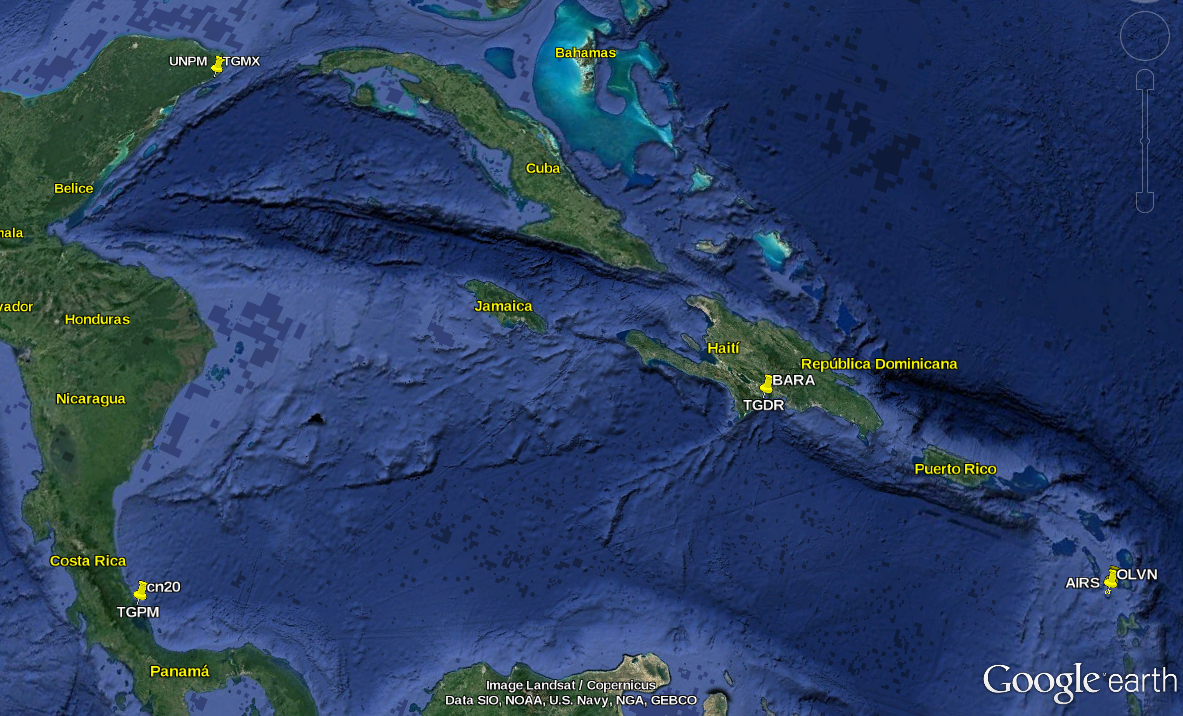

<gps_utils.Caption instance at 0x7f5cb49a2c68>

In [5]:
from IPython.display import Image
#Image(filename="../Documento/images/Red_Analisis.png")
#display(Image(filename))

filename = "../Documento/images/Red_Analisis.png"
pdf_name = "Red_Analisis"
figlabel = pdf_name
figcaption = "Ubicación de las estaciones empleadas para el estudio."

import matplotlib.image as mpimg
img = mpimg.imread(filename)
plt.imshow(img, extent=[0,100,0,1], aspect='auto')
save(pdf_name, ext="pdf", close=True, verbose=True)
display(Image(filename),Caption(pdf_name, figlabel, str(figcaption), size=(1.05, 0.35)))

In [6]:
%cat ../../0_bitbucket/0_Diseno_experimental.txt

Diseño experimental

1. Observaciones de una frecuencia (C1 ó L1) sin correccion ionosferica

1.1 sin error en observable de distancia (e(d) = 0)
1.2 con error en observable de distancia (e(d) = 5%)
1.3 con error en observable de distancia (e(d) = 10%)

2. Estación base con corrección ionoférica de doble frecuencia.
estaciones móviles: Sin Corrección ionoférica.

2.1 sin error en observable de distancia (e(d) = 0)
2.2 con error en observable de distancia (e(d) = 5%)
2.3 con error en observable de distancia (e(d) = 10%)

3. Estación base y móviles con corrección ionoférica mixta  #1.

estación maestro: Corrección ionoférica de doble frecuencia
estaciones móviles: Modelo ionosférico klobuchar.

3.1 sin error en observable de distancia (e(d) = 0)
3.2 con error en observable de distancia (e(d) = 5%)
3.3 con error en observable de distancia (e(d) = 10%)

4. Estación base y móviles con corrección ionoférica klobuchar.

4.1 sin error en observable de distancia (e(d) = 0)
4.2 con error en obse

## Desarrollo de los experimentos

<IPython.core.display.Latex object>

***********************************
Start simulation for scheme  7.1
***********************************
[GPS day]   [year]	[Station Pair]		[Process status]

 011	2017 	   ('BARA', 'TGDR', 'JME2')	 Running...  Finished!!!
 		 ('ljrn', 'p553', 'p554', 'fzhs')	 Running...  Finished!!!
 		 ('CN20', 'TGPM')	 Running...  Finished!!!
 		 ('TGMX', 'UNPM')	 Running...  Finished!!!

	Simulation Finished!
	 --------------------


index_gen  \
gps_day stations            scenario                      
11      bara,tgdr,jme2      7.1       (-1.0622, 4.9757)   
        cn20,tgpm           7.1       (-0.6985, 4.4427)   
        ljrn,p553,p554,fzhs 7.1        (0.6149, 0.8856)   
        tgmx,unpm           7.1       (-0.1701, 0.6610)   

                                                     improve_by_station  
gps_day stations            scenario                                     
11      bara,tgdr,jme2      7.1               (1.8673, 3.0137, -8.0677)  
        cn20,tgpm           7.1                       (-5.1411, 3.7442)  
        ljrn,p553,p554,fzhs 7.1       (-0.5224, 1.0561, 1.8016, 0.1243)  
        tgmx,unpm           7.1                       (-0.8310, 0.4909)

<gps_utils.Table_latex instance at 0x7f5cad7f3248>

<IPython.core.display.Latex object>

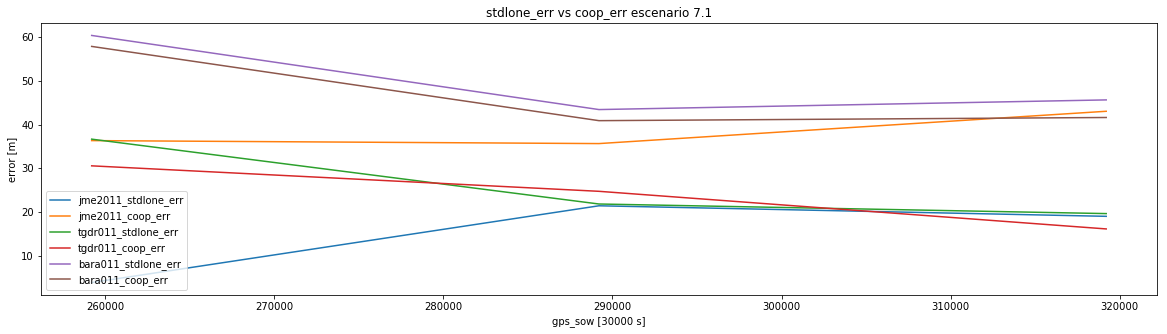

<gps_utils.Caption instance at 0x7f5cb09774d0>

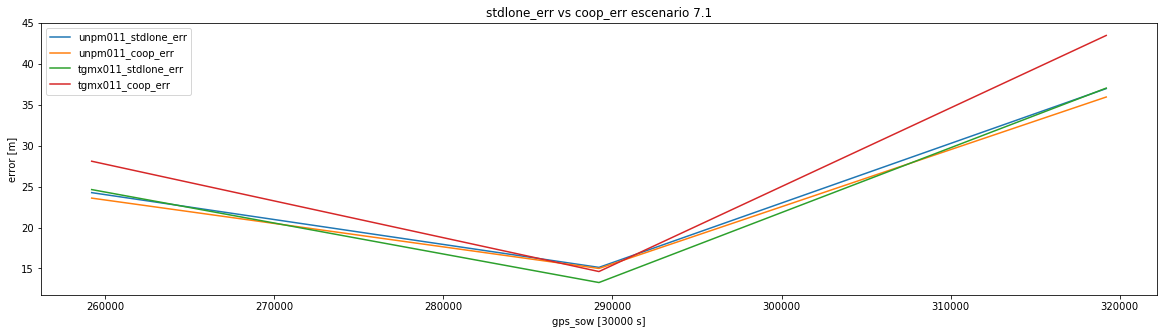

<gps_utils.Caption instance at 0x7f5cb499af80>

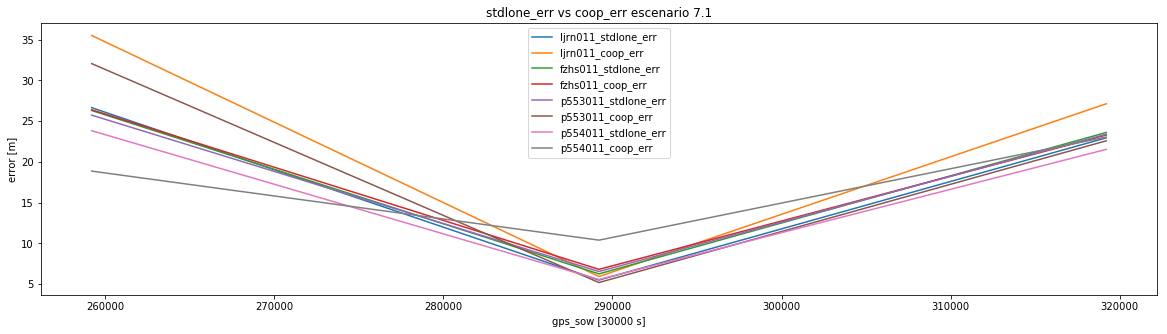

<gps_utils.Caption instance at 0x7f5cb48dfd88>

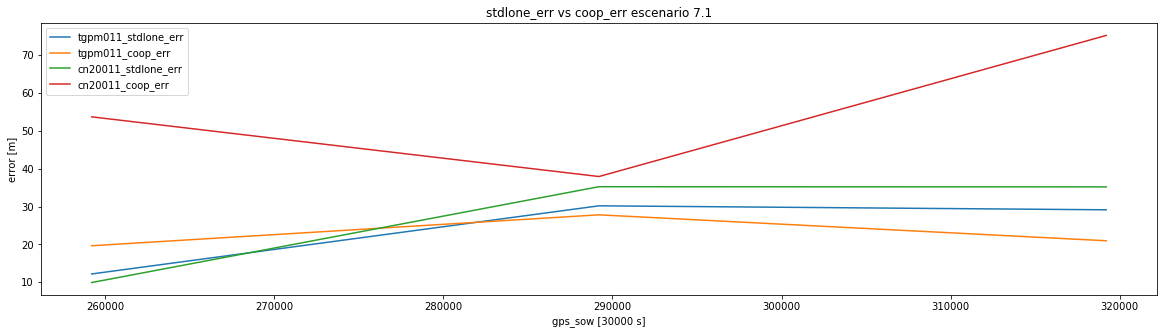

<gps_utils.Caption instance at 0x7f5cb4a2c830>

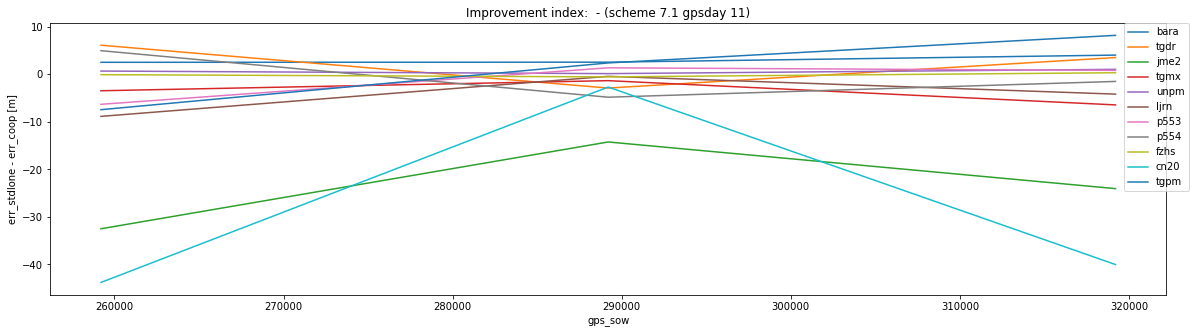

<gps_utils.Caption instance at 0x7f5c9fb24710>

<IPython.core.display.Latex object>

***********************************
Start simulation for scheme  7.2
***********************************
[GPS day]   [year]	[Station Pair]		[Process status]

 011	2017 	   ('BARA', 'TGDR', 'JME2')	 Running...  Finished!!!
 		 ('ljrn', 'p553', 'p554', 'fzhs')	 Running...  Finished!!!
 		 ('CN20', 'TGPM')	 Running...  Finished!!!
 		 ('TGMX', 'UNPM')	

Exception KeyboardInterrupt in <bound method Triple.<lambda> of <gpstk.gpstk.Triple; proxy of <Swig Object of type 'gpstk::Triple *' at 0x7f5cac17cae0> >> ignored


KeyboardInterrupt: 

In [7]:
scenarios = [["%s.%s" %(item, subitem) for subitem in range(1, len(distances)+1)] for item in range(1, 9)]
Ionos_master = [["%s" %(item) for subitem in range(1, len(distances)+1)] for item in ion_mas]
Ionos_rover  = [["%s" %(item) for subitem in range(1, len(distances)+1)] for item in ion_rov]

scenary = scenarios[N_shemes_start:N_shemes_end+1]
Ionos_m = Ionos_master[N_shemes_start:N_shemes_end+1]
Ionos_r = Ionos_rover[N_shemes_start:N_shemes_end+1]

df_res=pd.DataFrame()
Resul_final, Scheme_tags = [], []

for schemes, ionos_m, ionos_r in zip(scenary, Ionos_m, Ionos_r):

    tit = []
    for d, scheme, ion_mas, ion_rov in zip(distances, schemes, ionos_m, ionos_r):
        #print " \t ", scheme, ion_mas, ion_rov, d
        
        # incrustar titulo de seccion\n"
        display(Latex(section_title(0, scenario=scheme).encode("utf-8")))

        print "*"*35
        print "Start simulation for scheme ", scheme
        print "*"*35
        
        R11, _ = simulation_multirover(Observable, error_max, parejas_kmz, RinexDB, dia1, dian, ano,
                               distances = d,
                               Simu_Folder=None,
                               res_plot=resolucion,
                               iono_model_master= ion_mas,
                               iono_model_rover = ion_rov,
                               silent_exec=True)
        

        df_res = gen_df_results3(df_res, R11, scheme)
        df13 = create_multi(df_res,
                            index=['gps_day', 'stations', 'scenario'],
                            cols=["index_gen", "improve_by_station"])
        display(df13)
        
        Tabla = df13.to_latex().encode('ascii','ignore')
        label = "tabla_"+scheme
        caption = "\'Indice de mejora para escenario %s"%(scheme)

        display(Table_latex(table=Tabla, ref=label, cap=caption))
        # incrustar titulo de seccion\n",
        display(Latex(section_title(1, scenario=scheme).encode("utf-8")))
        
        plot_from_dict(R11, axis_labels=axis_labels, scenario=scheme, 
                       plot_inline=show_plots_nb,
                       plot_in_doc=show_plots_doc)
        
        plotting_df3(df_res, scheme,
            title="Improvement index: ",
            xlabel="gps_sow", #  ["+str(resolucion)+\"x30s]",
            ylabel="err_stdlone - err_coop [m]",
            plot_inline=show_plots_nb,
            plot_in_doc=show_plots_doc)

In [ ]:
tit = r"""\subsection{Resumen de los resultados para los escenarios}"""

display(Latex(section_title(tit, scenario="").encode("utf-8")))

df_fin = df_res.set_index("scenario").T
    
Tabla = df_fin.to_latex().encode('ascii','ignore')
label = "tabla_resumen_escenarios"
caption = "Resultados para todos los escenarios."
#Table_latex(Tabla, label, caption, landscape=True)

In [ ]:
# GUARDANDO TODOS LOS DICCIONARIOS PARA EXPORTAR A EXCEL O ALGO
csv_content = pd.DataFrame([Resul_final], columns=Scheme_tags)
#csv_content


# How to pickle or store Jupyter (IPython) notebook session for later
# https://goo.gl/ijgv2H
# conda install pytables

import pandas as pd
backup = pd.HDFStore('0_Test.h5')
backup['Resul_final'] = csv_content
backup['df_res'] = df_res
backup.close()